In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("AcademicPerformance_New.csv")  
df.head()  # Display first few rows

,Roll No,NationalITy,WT,DSBDA,AI,Average,Grade,PG
0,1.0,India,72.0,72.0,74.0,72.666667,C,Yes
1,2.0,Japan,69.0,90.0,NaN,53.000000,B,No
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,China,47.0,NaN,44.0,30.333333,D,Yes
4,5.0,India,76.0,78.0,NaN,51.333333,C,No


In [8]:
# Check for missing values in each column
df.isnull().sum()

Roll No         1
NationalITy     1
WT              8
DSBDA           4
AI             10
Average         1
Grade           1
PG              1
dtype: int64

In [10]:
# Display statistical information for all columns
df.describe(include='all')

,Roll No,NationalITy,WT,DSBDA,AI,Average,Grade,PG
count,98.000000,98,91.000000,95.000000,89.000000,98.000000,98,98
unique,NaN,5,NaN,NaN,NaN,NaN,4,2
top,NaN,USA,NaN,NaN,NaN,NaN,D,Yes
freq,NaN,30,NaN,NaN,NaN,NaN,52,49
mean,50.479592,NaN,61.164835,64.652632,62.235955,58.663265,NaN,NaN
std,28.469274,NaN,14.995009,14.893072,16.216590,16.518482,NaN,NaN
min,1.000000,NaN,18.000000,26.000000,20.000000,26.000000,NaN,NaN
25%,26.250000,NaN,51.000000,54.500000,52.000000,45.250000,NaN,NaN
50%,50.500000,NaN,63.000000,66.000000,63.000000,59.333333,NaN,NaN
75%,74.750000,NaN,71.000000,74.000000,74.000000,71.916667,NaN,NaN


In [12]:
# Check dimensions (rows, columns)
df.shape

(99, 8)

In [14]:
# View column names and data types
df.dtypes

Roll No        float64
NationalITy     object
WT             float64
DSBDA          float64
AI             float64
Average        float64
Grade           object
PG              object
dtype: object

In [16]:
# Get full info about the DataFrame including non-null counts and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Roll No      98 non-null     float64
 1   NationalITy  98 non-null     object 
 2   WT           91 non-null     float64
 3   DSBDA        95 non-null     float64
 4   AI           89 non-null     float64
 5   Average      98 non-null     float64
 6   Grade        98 non-null     object 
 7   PG           98 non-null     object 
dtypes: float64(5), object(3)
memory usage: 6.3+ KB


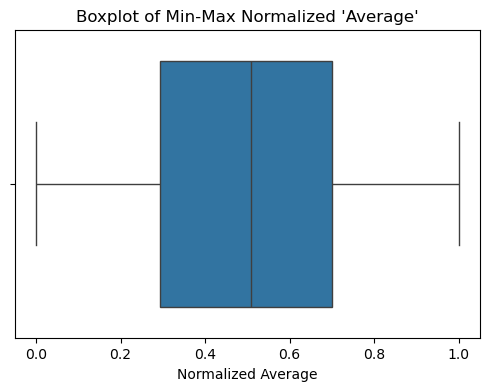

In [24]:
# Normalize the 'Average' column using Min-Max scaling
if 'Average' in df.columns:
    df['Average_MinMax'] = (df['Average'] - df['Average'].min()) / (df['Average'].max() - df['Average'].min())

    # Plotting a boxplot for normalized 'Average'
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df['Average_MinMax'])
    plt.title("Boxplot of Min-Max Normalized 'Average'")
    plt.xlabel("Normalized Average")
    plt.show()
else:
    print("Column 'Average' not found. Please replace with a valid numeric column.")

In [26]:
# Convert the 'PG' column (e.g., 'Yes', 'No') into numeric values
# Yes = 1, No = 0

if 'PG' in df.columns:
    df['PG_Encoded'] = df['PG'].map({'Yes': 1, 'No': 0})
    df[['PG', 'PG_Encoded']].head()
else:
    print("Column 'PG' not found. Please replace with the actual categorical column.")


In [28]:
df.head()

,Roll No,NationalITy,WT,DSBDA,AI,Average,Grade,PG,PG_Encoded,Average_MinMax
0,1.0,India,72.0,72.0,74.0,72.666667,C,Yes,1.0,0.710660
1,2.0,Japan,69.0,90.0,NaN,53.000000,B,No,0.0,0.411168
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,China,47.0,NaN,44.0,30.333333,D,Yes,1.0,0.065990
4,5.0,India,76.0,78.0,NaN,51.333333,C,No,0.0,0.385787
